In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()
df_original['job_posted_date'] = pd.to_datetime(df_original['job_posted_date'])
df_altered = df_original.copy()
df_altered['job_posted_month'] = df_altered['job_posted_date'].dt.strftime('%B')
df_altered.set_index('job_posted_month', inplace=True)

df_altered = df_altered.pivot_table(
    index='job_posted_month', 
    columns='job_title_short',
    aggfunc='size')


In [2]:
df_US_software_job = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

In [18]:
df_altered.reset_index(inplace=True)
df_altered['month_no'] = pd.to_datetime(df_altered['job_posted_month'], format='%B').dt.month
df_altered.sort_values('month_no', inplace=True) 
df_altered.set_index('job_posted_month', inplace=True)
df_altered.drop(columns='month_no', inplace=True)


In [34]:
df_merged = df_altered.merge(df_US_software_job, on='job_posted_month').copy()
top_5 = (
    df_merged
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
    .to_list()
)
top_5

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Front-End Developer',
 'Back-End Developer']

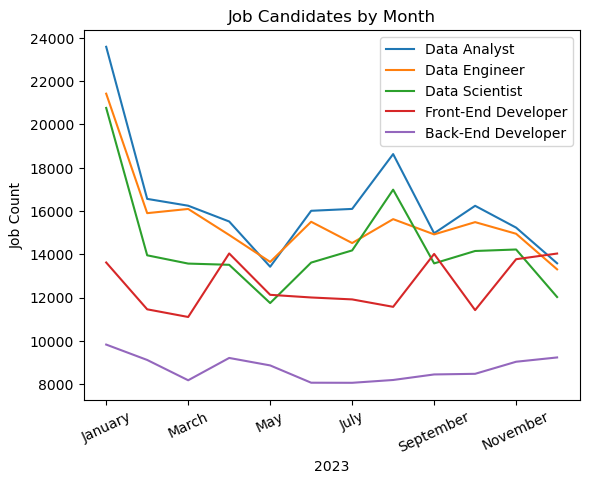

In [42]:
df_merged = df_merged[top_5]
df_merged.plot(kind='line')
plt.xticks(rotation=25)
plt.ylabel('Job Count')
plt.xlabel('2023')
plt.legend()
plt.title('Job Candidates by Month')
plt.show()